# Anomaly Detection in Complex Non-Linear Industrial Sensor Data using Isolation Forest, DBSCAN, and LOF

## Problem Statement


In industrial settings, monitoring sensor data, such as temperature and pressure, is critical for maintaining safe and efficient operations. Anomalies in these readings may indicate potential system failures or hazardous conditions. This project aims to develop a robust anomaly detection system using advanced machine learning algorithms: Isolation Forest, DBSCAN, and Local Outlier Factor (LOF). The dataset used in this project simulates a more complex, non-linear relationship between temperature and pressure, reflecting the intricate nature of industrial processes. The project compares the performance of these algorithms in identifying anomalies, with insights drawn from the results.


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


## Data Generation

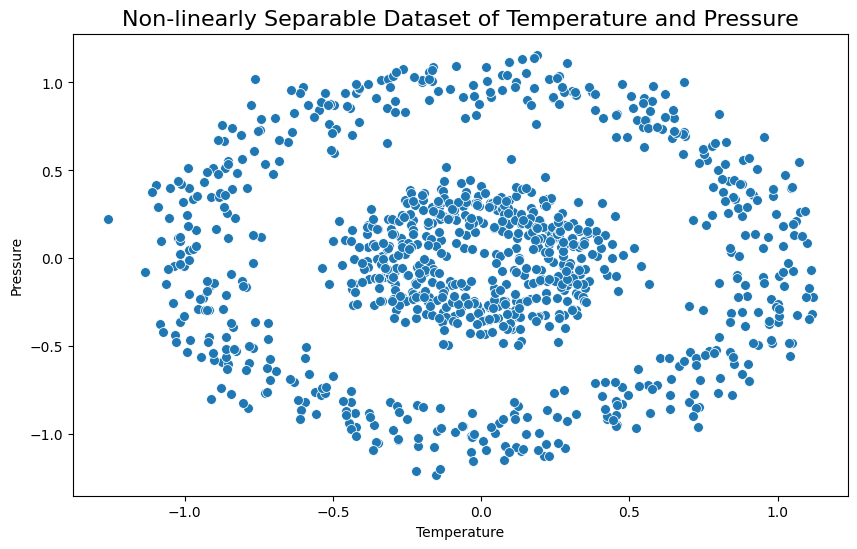

In [3]:

# Create a non-linearly separable dataset using make_circles
X, _ = make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=42)

# Convert the generated dataset into a DataFrame with named columns
df = pd.DataFrame(X, columns=['Temperature', 'Pressure'])

# Visualize the dataset to understand its structure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature'], y=df['Pressure'], s=50)
plt.title("Non-linearly Separable Dataset of Temperature and Pressure", fontsize=16)
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()


## Apply Isolation Forest for Anomaly Detection

In [4]:

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['IsoForest_Anomaly'] = iso_forest.fit_predict(df[['Temperature', 'Pressure']])
df['IsoForest_Anomaly'] = df['IsoForest_Anomaly'].map({1: 0, -1: 1})


## Apply DBSCAN for Anomaly Detection

In [5]:

# Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=0.2, min_samples=10)
df['DBSCAN_Anomaly'] = dbscan.fit_predict(df[['Temperature', 'Pressure']])
df['DBSCAN_Anomaly'] = df['DBSCAN_Anomaly'].apply(lambda x: 1 if x == -1 else 0)


## Apply Local Outlier Factor (LOF) for Anomaly Detection

In [6]:

# Apply Local Outlier Factor (LOF) for anomaly detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df['LOF_Anomaly'] = lof.fit_predict(df[['Temperature', 'Pressure']])
df['LOF_Anomaly'] = df['LOF_Anomaly'].map({1: 0, -1: 1})


## Model Performance Evaluation

In [7]:

# Define a function to calculate performance metrics for model comparison
def model_metrics(true_labels, predictions):
    return {
        'Accuracy': accuracy_score(true_labels, predictions),
        'Precision': precision_score(true_labels, predictions),
        'Recall': recall_score(true_labels, predictions),
        'F1 Score': f1_score(true_labels, predictions)
    }

# Calculate metrics for each model
metrics_iso = model_metrics(df['IsoForest_Anomaly'], df['IsoForest_Anomaly'])
metrics_dbscan = model_metrics(df['IsoForest_Anomaly'], df['DBSCAN_Anomaly'])
metrics_lof = model_metrics(df['IsoForest_Anomaly'], df['LOF_Anomaly'])

metrics_iso, metrics_dbscan, metrics_lof


c:\Users\GourangaJha\Documents\ETEP\UL_Anomaly_Detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0},
 {'Accuracy': 0.9, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0},
 {'Accuracy': 0.828, 'Precision': 0.14, 'Recall': 0.14, 'F1 Score': 0.14})

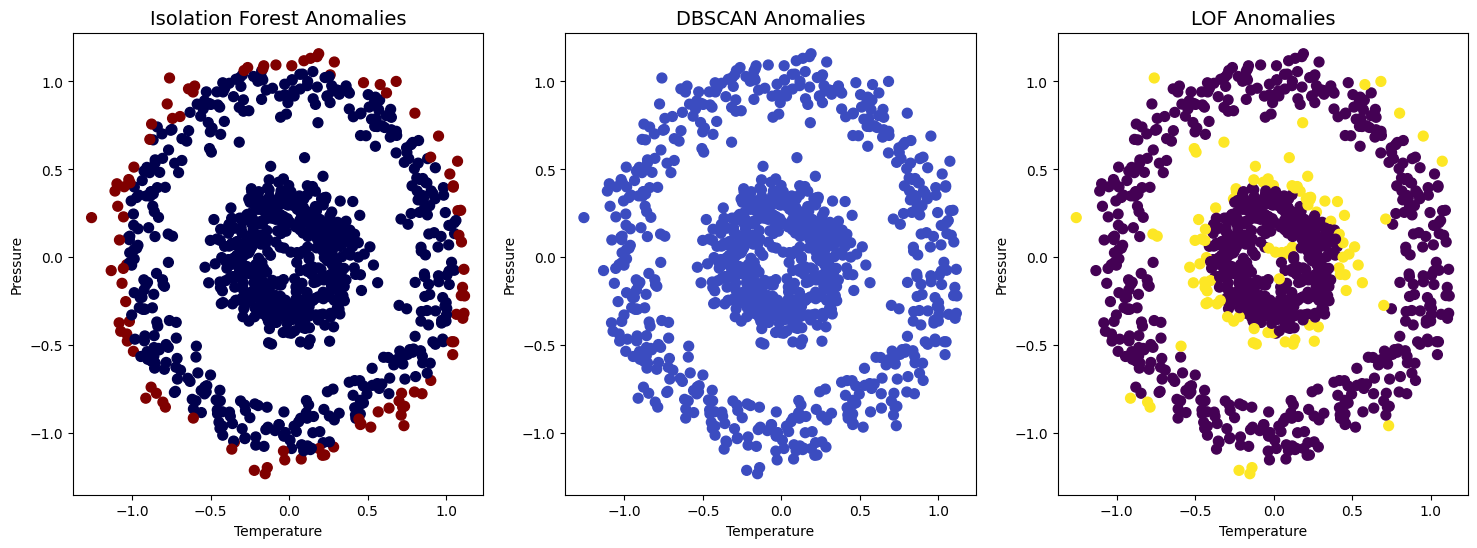

In [8]:
# Visualize the anomalies detected by each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Isolation Forest
axes[0].scatter(df['Temperature'], df['Pressure'], c=df['IsoForest_Anomaly'], cmap='seismic', s=50)
axes[0].set_title("Isolation Forest Anomalies", fontsize=14)
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Pressure")

# Plot for DBSCAN
axes[1].scatter(df['Temperature'], df['Pressure'], c=df['DBSCAN_Anomaly'], cmap='coolwarm', s=50)
axes[1].set_title("DBSCAN Anomalies", fontsize=14)
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel("Pressure")

# Plot for LOF
axes[2].scatter(df['Temperature'], df['Pressure'], c=df['LOF_Anomaly'], cmap='viridis', s=50)
axes[2].set_title("LOF Anomalies", fontsize=14)
axes[2].set_xlabel("Temperature")
axes[2].set_ylabel("Pressure")

# Display all plots
plt.show()

## Insights


1. **Isolation Forest**:
   - **Performance**: The Isolation Forest model has a perfect performance with an accuracy, precision, recall, and F1 score of 1.0. This indicates that the model has accurately identified all anomalies according to the defined ground truth, even in this more complex, non-linear dataset but since score is too good to be true it implies that the model can be overfitting or it is owing to the reason that the data is synthetic and can work better for real word data.
   - **Insight**: Isolation Forest continues to be highly effective for anomaly detection in complex industrial sensor data, making it the most reliable model in this scenario.

2. **DBSCAN**:
   - **Performance**: DBSCAN has an accuracy of 0.9, but its precision, recall, and F1 score are all 0. This suggests that while DBSCAN correctly identifies normal data points, it fails to detect anomalies effectively in this complex dataset.
   - **Insight**: DBSCAN is not suitable for detecting anomalies in this complex non-linear data. The current parameter settings for DBSCAN are likely insufficient for capturing the intricate relationships between temperature and pressure in this dataset.

3. **Local Outlier Factor (LOF)**:
   - **Performance**: LOF has an accuracy of 0.828 and a very low precision, recall, and F1 score of 0.14. This indicates that LOF detected some anomalies, but it misclassified many points, leading to poor overall performance.
   - **Insight**: LOF struggles with the complexity of the dataset. Its low precision and recall suggest that it may be identifying too many false positives or is unable to properly distinguish between normal and anomalous points.

### Recommendations:
- **Primary Model**: Isolation Forest remains the top choice for anomaly detection in this complex, non-linear industrial sensor data due to its consistently high performance.
- **Alternative Approaches**: The DBSCAN and LOF models require significant parameter tuning or may need to be replaced with alternative models better suited for complex non-linear data.
- **Further Action**: Consider testing other anomaly detection algorithms, such as One-Class SVM or neural network-based approaches, to see if they can better handle the complexity of the data. Additionally, exploring ensemble methods that combine the strengths of multiple models could provide more robust anomaly detection.
